### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [8]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline 

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [4]:
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

## Fit gradient boosting model to the orignal data

In [6]:
y = pd.DataFrame(df['partner'] - 1, columns=['partner'])

X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=101)

print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

Train Set Size is 5702.
Test Set Size is 2445.


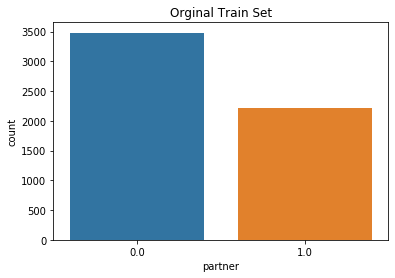

In [11]:
#check target variable in train set

sns.countplot(x='partner', data=y_train)

plt.title('Orginal Train Set')
plt.show()

In [12]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

type1_error = confusion_matrix(y_test, predict_test)[0,1]/predict_test.shape[0]
type2_error = confusion_matrix(y_test, predict_test)[1,0]/predict_test.shape[0]

print('Percent Type I errors: {}'.format(type1_error))
print('Percent Type II errors: {}'.format(type2_error))

print('\n')
      
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.18445807770961145


[[1360  171]
 [ 451  463]]
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1531
         1.0       0.73      0.51      0.60       914

    accuracy                           0.75      2445
   macro avg       0.74      0.70      0.71      2445
weighted avg       0.74      0.75      0.73      2445



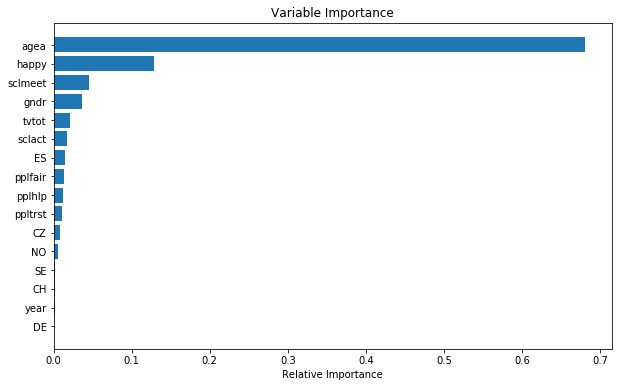

In [13]:
feature_importance = clf.feature_importances_

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])+0.5

plt.figure(figsize=(10,6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Adjustment 1: oversample target variable in train set

In [14]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE,partner
4453,7,7.0,5.0,5.0,5.0,8.0,4.0,2.0,1.0,80.0,0,0,0,1,0,0,0.0
1325,7,5.0,9.0,8.0,9.0,10.0,3.0,2.0,2.0,84.0,1,0,0,0,0,0,0.0
1064,7,7.0,4.0,8.0,9.0,8.0,5.0,1.0,2.0,84.0,1,0,0,0,0,0,0.0
4804,7,7.0,2.0,3.0,3.0,4.0,5.0,2.0,2.0,43.0,0,0,0,1,0,0,1.0
434,6,4.0,8.0,9.0,5.0,7.0,4.0,3.0,2.0,64.0,1,0,0,0,0,0,0.0


In [15]:
#run oversampling to make the target variable more balanced

target_count = df_train['partner'].value_counts()

#class count

count_class_0, count_class_1 = df_train['partner'].value_counts()

#divide by class

df_class_0 = df_train[df_train['partner'] == 0]
df_class_1 = df_train[df_train['partner'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')

print(df_train_over['partner'].value_counts())

Random over-sampling:
1.0    3482
0.0    3482
Name: partner, dtype: int64


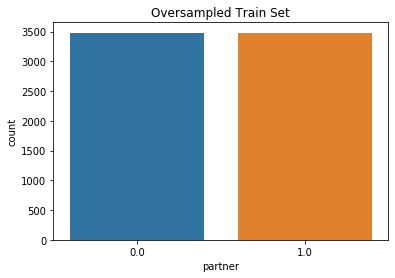

In [16]:
sns.countplot(x='partner', data=df_train_over)

plt.title('Oversampled Train Set')
plt.show()

In [17]:
X_train2 = df_train.drop(['partner'], axis=1)
y_train2 = df_train['partner']

In [18]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train2, y_train2)

predict_train = clf.predict(X_train2)
predict_test = clf.predict(X_test)

type1_error = confusion_matrix(y_test, predict_test)[0,1]/predict_test.shape[0]
type2_error = confusion_matrix(y_test, predict_test)[1,0]/predict_test.shape[0]

print('Percent Type I errors: {}'.format(type1_error))
print('Percent Type II errors: {}'.format(type2_error))

print('\n')
      
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.18445807770961145


[[1360  171]
 [ 451  463]]
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1531
         1.0       0.73      0.51      0.60       914

    accuracy                           0.75      2445
   macro avg       0.74      0.70      0.71      2445
weighted avg       0.74      0.75      0.73      2445



## Adjustment 2: Add age happy interaction as a feature

In [19]:
df['age_happy'] = df['agea'] * df['happy']
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_happy
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,480.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,531.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,168.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,640.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,440.0


In [20]:
y = pd.DataFrame(df['partner'] - 1, columns=['partner'])

X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=101)

print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

Train Set Size is 5702.
Test Set Size is 2445.


In [21]:
params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'exponential',
          'min_samples_leaf': 50, 
          'min_samples_split': 100}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

type1_error = confusion_matrix(y_test, predict_test)[0,1]/predict_test.shape[0]
type2_error = confusion_matrix(y_test, predict_test)[1,0]/predict_test.shape[0]

print('Percent Type I errors: {}'.format(type1_error))
print('Percent Type II errors: {}'.format(type2_error))

print('\n')
      
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

Percent Type I errors: 0.05194274028629857
Percent Type II errors: 0.1934560327198364


[[1404  127]
 [ 473  441]]
              precision    recall  f1-score   support

         0.0       0.75      0.92      0.82      1531
         1.0       0.78      0.48      0.60       914

    accuracy                           0.75      2445
   macro avg       0.76      0.70      0.71      2445
weighted avg       0.76      0.75      0.74      2445



## Adjustment 3: Parameter Tuning

In [22]:
#store results 

cv_avg = []
model = []

In [23]:
#baseline model 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y = pd.DataFrame(df['partner'] - 1, columns=['partner'])

X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=101)

gbm0 = ensemble.GradientBoostingClassifier(random_state=10)

gbm0.fit(X_train, y_train)

predict_train = gbm0.predict(X_train)
predict_test = gbm0.predict(X_test)

type1_error = confusion_matrix(y_test, predict_test)[0,1]/predict_test.shape[0]
type2_error = confusion_matrix(y_test, predict_test)[1,0]/predict_test.shape[0]

print('Percent Type I errors: {}'.format(type1_error))
print('Percent Type II errors: {}'.format(type2_error))

print('\n')
      
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

cv = cross_val_score(gbm0, X, y, cv=10)

print(cv)
print(np.mean(cv))


cv_avg.append(np.mean(cv))
model.append('Baseline')

Percent Type I errors: 0.06053169734151329
Percent Type II errors: 0.18732106339468302


[[1383  148]
 [ 458  456]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1531
         1.0       0.75      0.50      0.60       914

    accuracy                           0.75      2445
   macro avg       0.75      0.70      0.71      2445
weighted avg       0.75      0.75      0.74      2445

[0.76348039 0.74264706 0.73039216 0.72269939 0.77272727 0.77518428
 0.73095823 0.74692875 0.76658477 0.74201474]
0.7493617028744238


In [26]:
#Tuning hyperparameters in grid search 

param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [600, 700, 800]
             }

grid = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [29]:
grid.best_params_, grid.best_score_

({'max_depth': 3, 'min_samples_split': 600, 'n_estimators': 100},
 0.7588565415643633)

In [31]:
#Tuning hyperparameter with randome search 

n_est = [100, 200, 300, 400, 500]
max_depth = [1, 2, 3, 4, 5]
min_samples_split = [300, 400, 500, 600]

hyperparameters = dict(n_estimators=n_est, max_depth=max_depth, min_samples_split=min_samples_split)

In [32]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(ensemble.GradientBoostingClassifier(), hyperparameters,
                         random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=1)

In [33]:
best_model = clf.fit(X_train, y_train)

In [43]:
print('Best Hyperparameters:', best_model.best_estimator_)

Best Hyperparameters: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=600,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [40]:
best_model.best_score_

0.7595580498070852

In [ ]:
#run results from the best model
predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)

type1_error = confusion_matrix(y_test, predict_test)[0,1]/predict_test.shape[0]
type2_error = confusion_matrix(y_test, predict_test)[1,0]/predict_test.shape[0]

print('Percent Type I errors: {}'.format(type1_error))
print('Percent Type II errors: {}'.format(type2_error))

print('\n')
      
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

cv = cross_val_score(best_model, X, y, cv=10)

print(cv)
print(np.mean(cv))

Percent Type I errors: 0.06952965235173825
Percent Type II errors: 0.17995910020449898


[[1361  170]
 [ 440  474]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1531
         1.0       0.74      0.52      0.61       914

    accuracy                           0.75      2445
   macro avg       0.75      0.70      0.71      2445
weighted avg       0.75      0.75      0.74      2445

